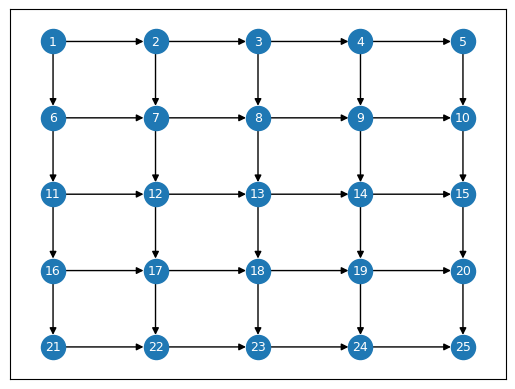

In [1]:
%run utils.py
G,pos = generate_gridNet(5, 5, "Network_5_5.tntp", draw=True, bi_direct=True)

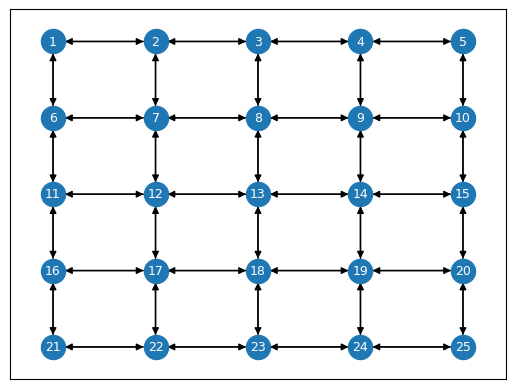

In [2]:
%run utils.py
link = 80
G,pos = generate_gridNet(5, 5, f"Random/Network_25_{link}.tntp", draw=True, target_links=link)

In [5]:
%run utils.py

dim1 = 5
dim2 = 5
origins = [i for i in range(1,dim1*dim2+1) if (i%dim1!=0)]
dest = [i for i in range(1,dim1*dim2+1) if (i%dim1!=1)]

OD_pairs = get_fullOD_pairs(dim1, dim2)

# Create 10000 entries 
for i in range(4):
    out = generate_Random_ODs(dim1, dim2, 10000, origins, dest, OD_pairs, f'stats_10000_{i+1}.pkl')

nb_entries :  0 . Number OD:  143
nb_entries :  1 . Number OD:  122
nb_entries :  2 . Number OD:  84
nb_entries :  3 . Number OD:  50
nb_entries :  4 . Number OD:  140
nb_entries :  5 . Number OD:  136
nb_entries :  6 . Number OD:  99
nb_entries :  7 . Number OD:  132
nb_entries :  8 . Number OD:  38
nb_entries :  9 . Number OD:  122
nb_entries :  10 . Number OD:  153
nb_entries :  11 . Number OD:  146
nb_entries :  12 . Number OD:  23
nb_entries :  13 . Number OD:  154
nb_entries :  14 . Number OD:  11
nb_entries :  15 . Number OD:  147
nb_entries :  16 . Number OD:  98
nb_entries :  17 . Number OD:  41
nb_entries :  18 . Number OD:  28
nb_entries :  19 . Number OD:  128
nb_entries :  20 . Number OD:  171
nb_entries :  21 . Number OD:  140
nb_entries :  22 . Number OD:  17
nb_entries :  23 . Number OD:  137
nb_entries :  24 . Number OD:  155
nb_entries :  25 . Number OD:  2
nb_entries :  26 . Number OD:  177
nb_entries :  27 . Number OD:  101
nb_entries :  28 . Number OD:  62
nb_entri

## Fusion of files

In [2]:
import pickle
a_file = open("stats_10000_1.pkl", "rb")

output = pickle.load(a_file)
a_file.close()

S = 0
for k,v in output.items() :
    S = S + len(v)
print(len(output))
print(S)

a_file2 = open("stats_10000_2.pkl", "rb")

output2 = pickle.load(a_file2)
a_file2.close()

S = 0
for k,v in output2.items() :
    S = S + len(v)
print(len(output2))
print(S)

a_file3 = open("stats_10000_3.pkl", "rb")

output3 = pickle.load(a_file3)
a_file3.close()

S = 0
for k,v in output3.items() :
    S = S + len(v)
print(len(output3))
print(S)

a_file4 = open("stats_10000_4.pkl", "rb")

output5 = pickle.load(a_file4)
a_file4.close()

S = 0
for k,v in output5.items() :
    S = S + len(v)
print(len(output5))
print(S)

185
10000
185
10000
185
10000
185
10000


In [3]:
output4 = {}
                
output4 = fuse_stats(output4, output)
output4 = fuse_stats(output4, output2)
output4 = fuse_stats(output4, output3)
output4 = fuse_stats(output4, output5)

S = 0
for k,v in output4.items() :
    S = S + len(v)
print(len(output4))
print(S)

# save fused file
file = open("stats_40000_1.pkl", "wb")
pickle.dump(output4 , file)
file.close()

185
40000


## Flow network : Solving

In [ ]:
import pickle
from tqdm import tqdm

with open('SiouxFalls/od_demand_list_4000.pkl', "rb") as a_file:
    stats = pickle.load(a_file)
    a_file.close()

count2 = 0
for OD_matrix in tqdm(stats) :
    print(len(OD_matrix))
    # count2+=len(OD_matrix)
    # print("Number of OD matrix, end of index: ", count2)

In [2]:
import pickle
%run utils.py

num_nodes = 24
min_demand = 100
max_demand = 2000

# Create 1000 OD demand
od_demand_list = [generate_OD_demand(num_nodes, min_demand, max_demand) for i in range(4000)]
with open('SiouxFalls/od_demand_list_4000.pkl', 'wb') as f:
    pickle.dump(od_demand_list, f)

# a_file = open("EMA/od_demand_list.pkl", "rb")
# output = pickle.load(a_file)
# a_file.close()

# for i, od_demand in enumerate(output):
#     print(len(od_demand))

In [8]:
# from utils import *
from tqdm.notebook import tqdm
%run utils.py

# This file contains 385 OD matrix
a_file = open('SiouxFalls/od_demand_list_4000.pkl', "rb")
stats = pickle.load(a_file)
a_file.close()

Network, Nodes, links, cap, fft, alpha, beta, lengths = readNet('SiouxFalls/SiouxFalls_net.tntp')
# print(links)
# print(Nodes)

# Output1: for network full 76 links
# Output2: for network 70 links
# Output3: for 65 links
# Output4: for 60 links

time = 0

# for val in tqdm(list(stats.values())):
for OD_matrix in tqdm(stats) :
    if time < 10000:
        print(time)
        data, Q, OD, O_D,n = get_data(Network, Nodes, links, cap, fft, alpha, beta, lengths, OD_matrix )
        flows, li, status, sol_time = TA_UE(data, n, OD, Q)
        if status ==2 : # if model solved to optimality => save data, flows, links, status, sol_time
            dataa = {'data' : data, 'path_flow' : flows, 'link_flow' : li, 'model_status': status, 'solving_time':sol_time}
            file_data = open("../Solution/SiouxFalls/Output1/5by5_Data{}".format(time), "wb")
            pickle.dump(dataa , file_data)
            file_data.close()
            time += 1
        else : 
            print("Error ! Networks details :")
            print(OD_matrix)
            print("*****************************")

  0%|          | 0/4000 [00:00<?, ?it/s]

0
Set parameter Username
Academic license - for non-commercial use only - expires 2025-06-24
model solved in: 0.7669401168823242
1
model solved in: 0.9551160335540771
2
model solved in: 0.660926103591919
3
model solved in: 0.640183687210083
4
model solved in: 0.5220620632171631
5
model solved in: 0.8721568584442139
6
model solved in: 0.7316629886627197
7
model solved in: 0.635673999786377
8
model solved in: 0.6757619380950928
9
model solved in: 0.608187198638916
10
model solved in: 0.7681987285614014
11
model solved in: 0.5446789264678955
12
model solved in: 0.7943670749664307
13
model solved in: 0.9374420642852783
14
model solved in: 0.940161943435669
15
model solved in: 0.81424880027771
16
model solved in: 1.0371580123901367
17
model solved in: 0.9766321182250977
18
model solved in: 0.5557689666748047
19
model solved in: 0.89215087890625
20
model solved in: 1.0351250171661377
21
model solved in: 0.775393009185791
22
model solved in: 1.201258897781372
23
model solved in: 1.39566993713